<a href="https://colab.research.google.com/github/Oluwills/Health-Care-Company-/blob/main/T_SHIRT_SIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

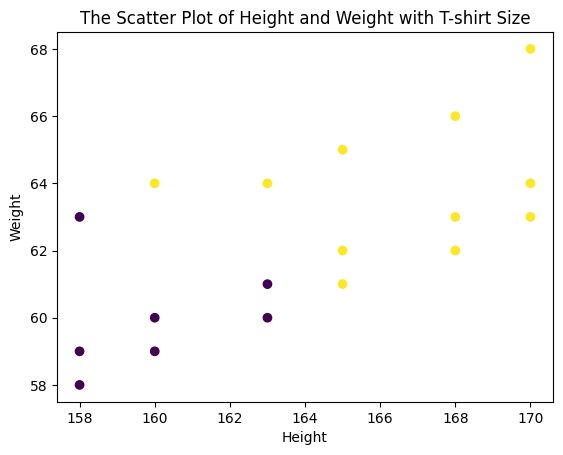

In [9]:
import matplotlib.pyplot as plt
import numpy as np
Height = [158,158,158,160,160,163,163,160,163,165,165,165,168,168,168,170,170,170]
Weight = [58,59,63,59,60,60,61,64,64,61,62,65,62,63,66,63,64,68]
Size = ['M','M','M','M','M','M','M','L','L','L','L','L','L','L','L','L','L','L']
Classes = {'M': 0, 'L': 1}
numeric_sizes = np.array([Classes[size] for size in Size])
plt.scatter(x=Height, y=Weight, c=numeric_sizes)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('The Scatter Plot of Height and Weight with T-shirt Size')
plt.show()

In [10]:
#Fit the KNN algorithm with K=1:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(Height, Weight))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, numeric_sizes)

KNeighborsClassifier(n_neighbors=1)

In [11]:
#Then apply it to classify a new data point:
liya_height = 161
liya_weight = 61
new_point = [(liya_height, liya_weight)]
predicted_class = knn.predict(new_point)
print(f"Predicted T-shirt size for Liya: {predicted_class[0]}")

Predicted T-shirt size for Liya: 0


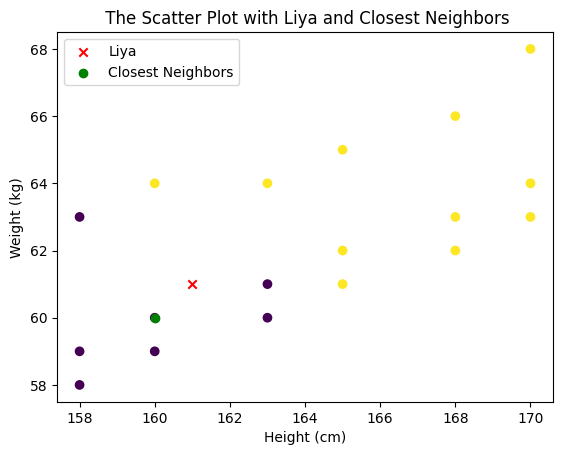

In [12]:
# Generate a plot with the results, including the new point and the closest neighbors
distances, neighbors = knn.kneighbors(new_point, n_neighbors=1)

# Extract data for plotting
heights = [data[item][0] for item in neighbors[0]]
weights = [data[item][1] for item in neighbors[0]]

# Scatter plot with Liya, closest neighbors, and new point
plt.scatter(x=Height, y=Weight, c=numeric_sizes)
plt.scatter(liya_height, liya_weight, c='red', label='Liya', marker='x')
plt.scatter(heights, weights, c='green', label='Closest Neighbors', marker='o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title(' The Scatter Plot with Liya and Closest Neighbors')
plt.legend()
plt.show()

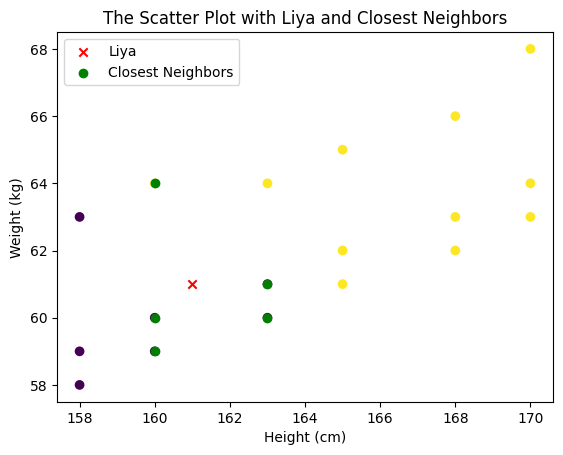

In [14]:
#With a higher K value, reproduce similar algorithm which changes the prediction:

distances, neighbors = knn.kneighbors(new_point, n_neighbors=5)

# Extract data for plotting
heights = [data[item][0] for item in neighbors[0]]
weights = [data[item][1] for item in neighbors[0]]

# Scatter plot with Liya, closest neighbors, and new point
plt.scatter(x=Height, y=Weight, c=numeric_sizes)
plt.scatter(liya_height, liya_weight, c='red', label='Liya', marker='x')
plt.scatter(heights, weights, c='green', label='Closest Neighbors', marker='o')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('The Scatter Plot with Liya and Closest Neighbors')
plt.legend()
plt.show()

In [15]:
import numpy as np

#Given data
Height = [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170]
Weight = [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68]
Size = ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
Classes = {'M': 0, 'L': 1}
numeric_sizes = np.array([Classes[size] for size in Size])

#Liya's information
liya_height = 161
liya_weight = 61

#Calculate Euclidean distances
distances = []
for i, (height, weight, size) in enumerate(zip(Height, Weight, Size)):
    distance = np.sqrt((liya_height - height) ** 2 + (liya_weight - weight) ** 2)
    distances.append((distance, i + 1, size))  # associating each distance with customer number and size

#Sort distances and select the five closest customers
distances.sort(key=lambda x: x[0])
closest_neighbors = distances[:5]

#Display the five closest neighbors to Liya
print("Five closest neighbors to Liya:")
for distance, customer_number, tshirt_size in closest_neighbors:
    print(f"{customer_number}. Distance: {distance:.3f}, Height: {Height[customer_number - 1]}, Weight: {Weight[customer_number - 1]}, Size: {tshirt_size}")

Five closest neighbors to Liya:
5. Distance: 1.414, Height: 160, Weight: 60, Size: M
7. Distance: 2.000, Height: 163, Weight: 61, Size: M
4. Distance: 2.236, Height: 160, Weight: 59, Size: M
6. Distance: 2.236, Height: 163, Weight: 60, Size: M
8. Distance: 3.162, Height: 160, Weight: 64, Size: L


In [16]:
import numpy as np

# Given data
Height = [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170]
Weight = [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68]
Size = ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']

# Standardize data
mean_height = np.mean(Height)
std_height = np.std(Height)
standardized_height = [(h - mean_height) / std_height for h in Height]

mean_weight = np.mean(Weight)
std_weight = np.std(Weight)
standardized_weight = [(w - mean_weight) / std_weight for w in Weight]

# Liya's information
liya_height = (161 - mean_height) / std_height
liya_weight = (61 - mean_weight) / std_weight

# Calculate Euclidean distances after standardization
distances = []
for i, (height, weight) in enumerate(zip(standardized_height, standardized_weight)):
    distance = np.sqrt((liya_height - height) ** 2 + (liya_weight - weight) ** 2)
    distances.append((distance, i + 1, Size[i], Height[i], Weight[i]))

# Sort distances and select the five closest customers
distances.sort(key=lambda x: x[0])
closest_neighbors = distances[:5]

# Display the five closest neighbors to Liya with customer number, size, height, and weight
print("Five closest neighbors to Liya after standardizing data:")
for distance, customer_number, size, height, weight in closest_neighbors:
    print(f"{customer_number}. Distance: {distance:.3f}, Size: {size}, Height: {height}, Weight: {weight}")


Five closest neighbors to Liya after standardizing data:
5. Distance: 0.457, Size: M, Height: 160, Weight: 60
7. Distance: 0.476, Size: M, Height: 163, Weight: 61
6. Distance: 0.616, Size: M, Height: 163, Weight: 60
4. Distance: 0.817, Size: M, Height: 160, Weight: 59
10. Distance: 0.952, Size: L, Height: 165, Weight: 61
